In [1]:
import numpy as np
import cvxpy as cp
import osbdo as ob

(CVXPY) Oct 10 10:47:34 AM: Encountered unexpected exception importing solver SCS:
ImportError('dlopen(/opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/scs-3.2.0-py3.10-macosx-10.9-x86_64.egg/_scs_direct.cpython-310-darwin.so, 2): Symbol not found: _aligned_alloc\n  Referenced from: /opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/scs-3.2.0-py3.10-macosx-10.9-x86_64.egg/scs/.dylibs/libgomp.1.dylib (which was built for Mac OS X 10.15)\n  Expected in: /usr/lib/libSystem.B.dylib\n in /opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/scs-3.2.0-py3.10-macosx-10.9-x86_64.egg/scs/.dylibs/libgomp.1.dylib')


# Create parameters

In [2]:
params, R = ob.ra_params(num_resources=50, num_agents=50, num_participants=500)

# Distributed solution with agent failure probability $p$

In [3]:
agents = ob.ra_agents(params=params)
g = ob.ra_coupling(agents, R)
prob = ob.Problem(agents = agents, g = g)

In [4]:
max_iter = 80
fail_probability = [0, 0.01, 0.02]
fail_bounds = {}
for p in fail_probability:
    agent_reply_pattern = [[np.random.rand()>p for j in range(max_iter+1)] for i in range(len(agents))]
    prob.solve(rel_gap=10**(-5), abs_gap=10**(-5), max_iter=max_iter, agent_reply_pattern=agent_reply_pattern)
    fail_bounds[p] = {'uk':prob.upper_bnd, 'lk':prob.lower_bnd}

/opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/cvxpy-1.3.0-py3.10-macosx-10.9-x86_64.egg/cvxpy/problems/problem.py:1358: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


k=0, rel_gap=240.10856493316612, L=-1058765.78281904, U=-4391.24086327055
k=1, rel_gap=0.1876746349030392, L=-5215.365389056157, U=-4391.24086327055
k=2, rel_gap=0.09316158191148931, L=-5203.265261792231, U=-4759.831801529161
k=3, rel_gap=0.059195165427494756, L=-5195.765926888983, U=-4905.3905233715395
k=4, rel_gap=0.047424694208585264, L=-5192.045706165657, U=-4956.963240291629
k=5, rel_gap=0.043322739668392736, L=-5190.0447677640395, U=-4974.534312760816
k=6, rel_gap=0.04134723529344059, L=-5186.838162284134, U=-4980.892046851729
k=7, rel_gap=0.04022962526372852, L=-5183.643255538455, U=-4983.172108969931
k=8, rel_gap=0.039299298201836176, L=-5179.0072756714135, U=-4983.172108969931
k=9, rel_gap=0.03751980620481047, L=-5170.1397607837, U=-4983.172108969931
k=10, rel_gap=0.036608350772668115, L=-5166.601745088886, U=-4984.140578491191
k=11, rel_gap=0.03426696536780506, L=-5154.931951082621, U=-4984.140578491191
k=12, rel_gap=0.03205434598307496, L=-5152.292482346015, U=-4992.26857810

/opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/cvxpy-1.3.0-py3.10-macosx-10.9-x86_64.egg/cvxpy/problems/problem.py:154: UserWarning: Objective contains too many subexpressions. Consider vectorizing your CVXPY code to speed up compilation.
  warnings.warn("Objective contains too many subexpressions. "


k=15, rel_gap=0.027367121450664923, L=-5139.015483691251, U=-5002.121808643095


/opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/cvxpy-1.3.0-py3.10-macosx-10.9-x86_64.egg/cvxpy/problems/problem.py:160: UserWarning: Constraint #0 contains too many subexpressions. Consider vectorizing your CVXPY code to speed up compilation.
  warnings.warn(f"Constraint #{i} contains too many subexpressions. "


k=16, rel_gap=0.025623737958496314, L=-5131.584225736582, U=-5003.378954499433
k=17, rel_gap=0.02429051497552302, L=-5127.1878367284935, U=-5005.599253109373
k=18, rel_gap=0.02333248685706959, L=-5123.536524936824, U=-5006.717357984587
k=19, rel_gap=0.022405061208756037, L=-5121.620374774158, U=-5009.3848016744305
k=20, rel_gap=0.02147000433683139, L=-5119.011411697974, U=-5011.416282381574
k=21, rel_gap=0.020808512698848848, L=-5117.034041191887, U=-5012.726654936777
k=22, rel_gap=0.02022406177631353, L=-5114.929227761446, U=-5013.53518251259
k=23, rel_gap=0.019380497292607334, L=-5110.699987543667, U=-5013.53518251259
k=24, rel_gap=0.018908207538957514, L=-5108.332146247403, U=-5013.53518251259
k=25, rel_gap=0.018126608633772922, L=-5106.42459713208, U=-5015.510402959025
k=26, rel_gap=0.017472859639031724, L=-5105.618555559503, U=-5017.940780622709
k=27, rel_gap=0.017158507834491604, L=-5104.841182837212, U=-5018.727310953047
k=28, rel_gap=0.016621808016072537, L=-5104.031934914737, 

k=41, rel_gap=0.01276757201001638, L=-5094.597238516169, U=-5030.371606789345
k=42, rel_gap=0.01233646194405997, L=-5094.021250367547, U=-5031.9448541694765
k=43, rel_gap=0.012230125026939908, L=-5093.486168864636, U=-5031.9448541694765
k=44, rel_gap=0.012044655026772268, L=-5092.55289405169, U=-5031.9448541694765
k=45, rel_gap=0.011958017836796921, L=-5092.1169404894135, U=-5031.9448541694765
k=46, rel_gap=0.011740754724427467, L=-5091.551044003935, U=-5032.466093936035
k=47, rel_gap=0.011689844927447648, L=-5091.294842176785, U=-5032.466093936035
k=48, rel_gap=0.011523406940901676, L=-5090.4572486527495, U=-5032.466093936035
k=49, rel_gap=0.01146307600142317, L=-5090.153635245409, U=-5032.466093936035
k=50, rel_gap=0.011220747716638163, L=-5089.726252908286, U=-5033.249430849808
k=51, rel_gap=0.010726143590698536, L=-5088.881654166543, U=-5034.876842195669
k=52, rel_gap=0.010588342589555148, L=-5088.187843097055, U=-5034.876842195669
k=53, rel_gap=0.010534406892928798, L=-5087.916283

k=66, rel_gap=0.00908712646400281, L=-5087.5176187418865, U=-5041.703025752924
k=67, rel_gap=0.00906721967110414, L=-5087.417254603896, U=-5041.703025752924
k=68, rel_gap=0.008731445553003545, L=-5086.764212964833, U=-5042.733856855412
k=69, rel_gap=0.00872163960824897, L=-5086.714764195221, U=-5042.733856855412
k=70, rel_gap=0.00849965001855964, L=-5086.55674015998, U=-5043.687164458977
k=71, rel_gap=0.008484792070235208, L=-5086.481801316726, U=-5043.687164458977
k=72, rel_gap=0.008420786319767613, L=-5086.158976334641, U=-5043.687164458977
k=73, rel_gap=0.008239150910181854, L=-5086.108663705913, U=-5044.545888854305
k=74, rel_gap=0.00805803029528292, L=-5085.950762386826, U=-5045.2956174527335
k=75, rel_gap=0.007884178141029713, L=-5085.700816059187, U=-5045.917900447052
k=76, rel_gap=0.007874941750339242, L=-5085.654209990066, U=-5045.917900447052
k=77, rel_gap=0.007816757110607524, L=-5085.360615074913, U=-5045.917900447052
k=78, rel_gap=0.007793754549531498, L=-5085.244546040223

# Centralized solution

In [5]:
h_cvx = ob.cvx_resource_allocation(params=params, R=R)[0]

# Plot

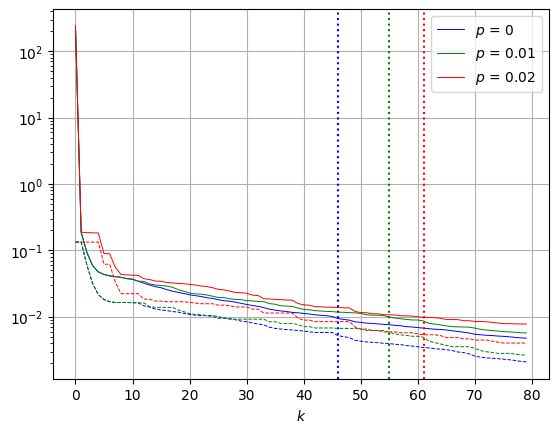

In [6]:
ob.plot_agent_failure(fail_bounds=fail_bounds, fail_probability=fail_probability, h_true=h_cvx)